In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [2]:
input_img = layers.Input(shape=(32, 32, 3))
# Encoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)
# Decoder
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
# Create the autoencoder model
autoencoder = models.Model(input_img, decoded)

In [3]:
(X_train, _), (X_test, _) = cifar10.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [20]:
# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [17]:
X_train = X_train.reshape((len(X_train), 32 * 32 * 3))  # 32x32 RGB images
X_test = X_test.reshape((len(X_test), 32 * 32 * 3))

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - loss: 0.6264 - val_loss: 0.5798
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.5784 - val_loss: 0.5816
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.5753 - val_loss: 0.5727
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.5708 - val_loss: 0.5700
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.5692 - val_loss: 0.5682
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.5676 - val_loss: 0.5676
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.5660 - val_loss: 0.5653
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.5644 - val_loss: 0.5678
Epoch 9/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.5640 - val_loss: 0.5643
Epoch 10/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.5636 - val_loss: 0.5646
Epoch 11/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.5631 - val_loss: 0.5641
Epoch 12/50
196/196 ━━━━━━━━━━━━━━━━━━━━

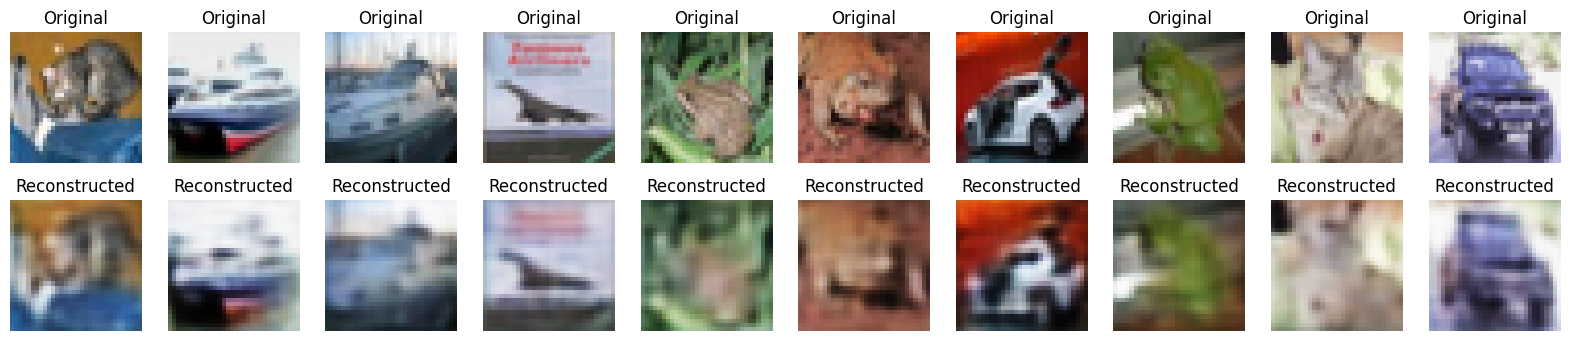

In [5]:
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_data=(X_test, X_test))
def plot_comparison(n=10):
    decoded_imgs = autoencoder.predict(X_test)

    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(X_test[i])
        plt.title("Original")
        plt.axis("off")

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i])
        plt.title("Reconstructed")
        plt.axis("off")
    plt.show()
plot_comparison()

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def binarize_images(images, threshold=0.5):
    return (images > threshold).astype(np.float32)
def get_binary_images(n=100):
    decoded_imgs = autoencoder.predict(X_test[:n])
    X_test_binary = binarize_images(X_test[:n])
    decoded_binary = binarize_images(decoded_imgs)
    return X_test_binary, decoded_binary

In [7]:
def flatten_images(original, reconstructed):
    return original.flatten(), reconstructed.flatten()
def plot_confusion_matrix():
    X_test_binary, decoded_binary = get_binary_images()
    original_flat, reconstructed_flat = flatten_images(X_test_binary, decoded_binary)
    cm = confusion_matrix(original_flat, reconstructed_flat)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Background', 'Foreground'], yticklabels=['Background', 'Foreground'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


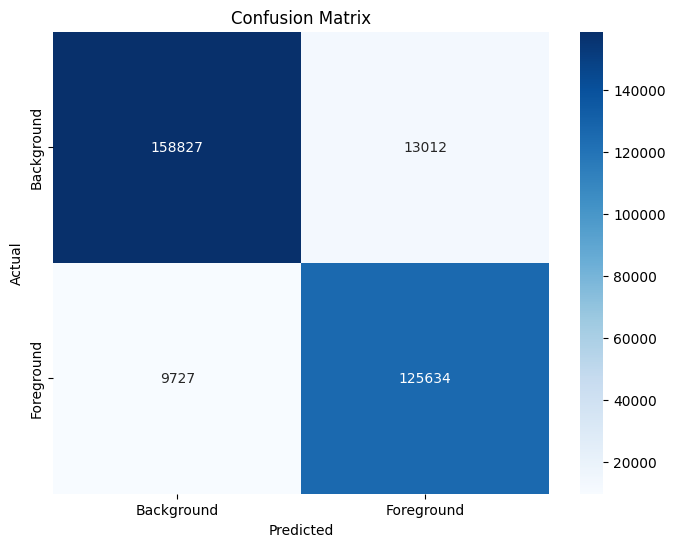

In [10]:
plot_confusion_matrix()